<a href="https://colab.research.google.com/github/ryogrid/ryogridJupyterNotebooks/blob/master/keras_lstm_prediction_sample_air_passenger.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /root/
!wget https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv

/root
--2020-02-14 04:47:47--  https://www.analyticsvidhya.com/wp-content/uploads/2016/02/AirPassengers.csv
Resolving www.analyticsvidhya.com (www.analyticsvidhya.com)... 104.26.14.185, 104.26.15.185, 2606:4700:20::681a:fb9, ...
Connecting to www.analyticsvidhya.com (www.analyticsvidhya.com)|104.26.14.185|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [application/octet-stream]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2020-02-14 04:47:53 (66.1 MB/s) - ‘AirPassengers.csv’ saved [1746/1746]



Using TensorFlow backend.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1000





72/72 [==============================] - 10s 139ms/step - loss: 30274.3320
Epoch 2/1000
72/72 [==============================] - 0s 2ms/step - loss: 44929.7309
Epoch 3/1000
72/72 [==============================] - 0s 2ms/step - loss: 26867.3987
Epoch 4/1000
72/72 [==============================] - 0s 2ms/step - loss: 28697.6124
Epoch 5/1000
72/72 [==============================] - 0s 2ms/step - loss: 31161.5875
Epoch 6/1000
72/72 [==============================] - 0s 2ms/step - loss: 31527.2418
Epoch 7/1000
72/72 [==============================] - 0s 2ms/step - loss: 32991.7613
Epoch 8/1000
72/72 [==============================] - 0s 2ms/step - loss: 55657.9722
Epoch 9/1000
72/72 [==============================] - 0s 2ms/step - loss: 42178.8516
Epoch 10/1000
72/72 [==============================] - 0s 2ms/step - loss: 33797.4084
Epoch 11/1000
72/72 [===================

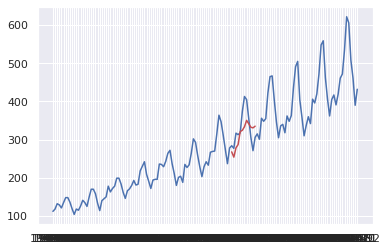

In [2]:
# coding:utf-8
# http://sweng.web.fc2.com/ja/program/python/time-series-forecast-lstm.html

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
import pandas as pd
from matplotlib import pylab as plt
import seaborn as sns
%matplotlib inline
sns.set()

df = pd.read_csv('AirPassengers.csv', index_col='Month', dtype={1: 'float'})
ts = df['#Passengers']

x = []  # train
y = []  # test (answer)
for i in range(0, 72):
    tmpX = []
    for j in range(0, 24):
        tmpX.append(ts[i + j])
    x.append(tmpX)

    tmpY = []
    for j in range(0, 12):
        tmpY.append(ts[24 + i + j])
    y.append(tmpY)

x = np.array(x)
y = np.array(y)
x = x.reshape((x.shape[0], x.shape[1], 1))
y = y.reshape((y.shape[0], y.shape[1], 1))

m = Sequential()
# 入力データ数が24なので、input_shapeの値が(24,1)です。
m.add(LSTM(100, activation='relu', input_shape=(24, 1)))
# 予測範囲は12ステップなので、RepeatVectoorに12を指定する必要があります。
m.add(RepeatVector(12))
m.add(LSTM(100, activation='relu', return_sequences=True))
m.add(TimeDistributed(Dense(1)))
m.compile(optimizer='adam', loss='mse')
m.fit(x, y, epochs=1000, verbose=1)

# データ60番～83番から、次の一年(84番～95番)を予測
input = np.array(ts[60:84])
input = input.reshape((1, 24, 1))
yhat = m.predict(input)

# 可視化用に、予測結果yhatを、配列predictに格納
predict = []
for i in range(0, 12):
    predict.append(yhat[0][i])

# 比較するために実データをプロット
plt.plot(ts)

# 予測したデータをプロット
xdata = np.arange(84, 96, 1)
plt.plot(xdata, predict, 'r')